In [1]:
#Import Libraries
!pip install plotnine
from plotnine import *
theme_set(theme_gray())
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from plotnine import *
%matplotlib inline

C:\Users\Oby\anaconda3\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
C:\Users\Oby\anaconda3\lib\site-packages\plotnine\geoms\geom_map.py:8: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migratio

In [2]:
#Load in the dataset into a pandas dataframe, print statistics
crime= pd.read_csv('crimedata.csv')
crime.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [3]:
#view Crime shape
crime.shape

(677905, 28)

In [4]:
#View crime Info
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677905 entries, 0 to 677904
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           677905 non-null  int64  
 1   Date Rptd       677905 non-null  object 
 2   DATE OCC        677905 non-null  object 
 3   TIME OCC        677905 non-null  int64  
 4   AREA            677905 non-null  int64  
 5   AREA NAME       677905 non-null  object 
 6   Rpt Dist No     677905 non-null  int64  
 7   Part 1-2        677905 non-null  int64  
 8   Crm Cd          677905 non-null  int64  
 9   Crm Cd Desc     677905 non-null  object 
 10  Mocodes         584710 non-null  object 
 11  Vict Age        677905 non-null  int64  
 12  Vict Sex        589079 non-null  object 
 13  Vict Descent    589074 non-null  object 
 14  Premis Cd       677897 non-null  float64
 15  Premis Desc     677556 non-null  object 
 16  Weapon Used Cd  235770 non-null  float64
 17  Weapon Des

In [5]:
#View the missing values in the dataset
crime.isna().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes            93195
Vict Age               0
Vict Sex           88826
Vict Descent       88831
Premis Cd              8
Premis Desc          349
Weapon Used Cd    442135
Weapon Desc       442135
Status                 0
Status Desc            0
Crm Cd 1               8
Crm Cd 2          627199
Crm Cd 3          676196
Crm Cd 4          677854
LOCATION               0
Cross Street      567360
LAT                    0
LON                    0
dtype: int64

In [6]:
#DATA CLEANSING
#assign '1501 Other MO' to missing values for unknown MO
#gotten fro MO codes dicument
crime['Mocodes'].fillna('1501 Other MO', inplace=True)

In [7]:
#assign X to missing values for unknown victim sex
crime['Vict Sex'].fillna('X', inplace=True)

In [8]:
#assign X to missing values for unknown Vict Descent  
crime['Vict Descent'].fillna('X', inplace=True)

In [9]:
#drop the missing rows for premise description
crime = crime.dropna(subset=['Premis Desc'])

In [10]:
#Assign 500 =  UNKNOWN WEAPON/OTHER WEAPON for missing weapon used cd
crime['Weapon Used Cd'].fillna(500, inplace=True)

In [11]:
#Assign UNKNOWN WEAPON/OTHER WEAPON for missing weapon description
crime['Weapon Desc'].fillna('UNKNOWN WEAPON/OTHER WEAPON', inplace=True)

In [12]:
#drop the column part 1-2 from the dataframe
crime.drop('Part 1-2', axis=1, inplace=True)
#drop the column Crm Cd 1
crime.drop('Crm Cd 1', axis=1, inplace=True)
#drop the column Crm Cd 2
crime.drop('Crm Cd 2', axis=1, inplace=True)
#drop the column Crm Cd 3
crime.drop('Crm Cd 3', axis=1, inplace=True)
#drop the column Crm Cd 4
crime.drop('Crm Cd 4', axis=1, inplace=True)

In [13]:
#assign none to missing values for unknown Cross Street
crime['Cross Street'].fillna('None', inplace=True)

In [14]:
#Change time datatype to integer
#separate Year, month, date from the date crime occured
crime['Date Rptd'] = pd.to_datetime(crime['Date Rptd'])
crime['Year'] = crime['Date Rptd'].dt.year
crime['Month'] = crime['Date Rptd'].dt.month
crime['Day'] = crime['Date Rptd'].dt.day

In [15]:
#feature Engineering

In [16]:
#rename column
new_column_names = {'Date Rptd': 'date_rptd', 
                    'DATE OCC': 'date_occ', 
                    'TIME OCC': 'time_occ', 
                    'AREA NAME': 'area_name', 
                    'Rpt Dist No': 'rpt_dist_no', 
                    'Crm Cd': 'crm_cd', 
                    'Crm Cd Desc': 'crm_cd_desc', 
                    'Vict Age': 'vict_age', 
                    'Vict Sex': 'vict_sex', 
                    'Vict Descent': 'vict_descent', 
                    'Premis Cd': 'premis_cd', 
                    'Premis Desc': 'premis_desc', 
                    'Weapon Used Cd': 'weapon_used_cd', 
                    'Weapon Desc': 'weapon_desc', 
                    'Status Desc': 'status_desc',  
                    'Cross Street': 'cross_street'
                   }

crime.rename(columns=new_column_names, inplace=True)


In [17]:
#Assign Categories based on UCR reporting
# Define the crime code categories
# Based on UCR REPORTING – Return A (Based on date of reporting) in pdf file UCR.COMPSTAT062618
HOMICIDE = [110, 113]
RAPE = [121, 122, 815, 820, 821]
ROBBERY = [210, 220]
AGG_ASSAULTS = [230, 231, 235]
DOMESTIC_VIOLENCE = [626, 627, 647, 763, 928, 930, 236, 250, 251, 761, 926]
SIMPLE_ASSAULT = [435, 436, 437, 622, 623, 624, 625]
BURGLARY = [310, 320]
MVT = [510, 520, 433]
BTFV = [330, 331, 410, 420, 421]
PERSONAL_THFT = [350, 351, 352, 353, 450, 451, 452, 453]


# Define a function to map crime codes to categories
def map_category(code):
    if code in HOMICIDE:
        return 'HOMICIDE'
    elif code in RAPE:
        return 'RAPE'
    elif code in ROBBERY:
        return 'ROBBERY'
    elif code in AGG_ASSAULTS:
        return 'AGG.ASSAULTS'
    elif code in DOMESTIC_VIOLENCE:
        return 'Domestic.Violence'
    elif code in SIMPLE_ASSAULT:
        return 'SIMPLE.ASSAULT'
    elif code in BURGLARY:
        return 'BURGLARY'
    elif code in MVT:
        return 'MVT'
    elif code in BTFV:
        return 'BTFV'
    elif code in PERSONAL_THFT:
        return 'PERSONAL.THFT'
    else:
        return 'OTHER.THEFT'

# Check if the 'crm_cd' column exists in the DataFrame
if 'crm_cd' in crime.columns:
    # Map the crime codes to categories
    crime['crm_cd'] = crime['crm_cd'].apply(map_category)
else:
    print("The 'Crm Cd' column does not exist in the DataFrame.")

In [18]:
#Feature engineering for crime category (assault or larceny)
# Create a dictionary to map crime codes to crime categories
crime_dict = {
    "BTFV": "Larceny",
    "BURGLARY": "Larceny",
    "ROBBERY": "Larceny",
    "MVT": "Larceny",
    "OTHER.THEFT": "Larceny",
    "PERSONAL.THFT": "Larceny",
    "RAPE": "Assault",
    "AGG.ASSAULTS": "Assault",
    "Domestic.Violence": "Assault",
    "SIMPLE.ASSAULT": "Assault",
    "HOMICIDE": "Unknown"
}

# Define a function to apply the dictionary to the "crm_cd" column
def categorize_crime(crm_cd):
    if crm_cd in crime_dict:
        return crime_dict[crm_cd]
    else:
        return None

# Apply the function to create a new column called "crime_category"
crime["crime_category"] = crime["crm_cd"].apply(categorize_crime)


In [19]:
#Feature Engineering for crime type (violent or Property)
# Create a dictionary to map crime codes to crime types
crime_dict = {
    "BTFV": "Property",
    "MVT": "Property",
    "BURGLARY": "Property",
    "OTHER.THEFT": "Property",
    "PERSONAL.THFT": "Property",
    "HOMICIDE": "Violent",
    "RAPE": "Violent",
    "ROBBERY": "Violent",
    "AGG.ASSAULTS": "Violent",
    "Domestic.Violence": "Violent",
    "SIMPLE.ASSAULT": "Violent"
}

# Define a function to apply the dictionary to the "crm_cd" column
def categorize_crime_type(crm_cd):
    if crm_cd in crime_dict:
        return crime_dict[crm_cd]
    else:
        return None

# Apply the function to create a new column called "crime_type"
crime["crime_type"] = crime["crm_cd"].apply(categorize_crime_type)


In [20]:
#concatenate Area name and rpt_dis_no to District Area 

In [21]:
#drop the column date_rptd
crime.drop('date_rptd', axis=1, inplace=True)

In [22]:
crime.isna().sum()

DR_NO             0
date_occ          0
time_occ          0
AREA              0
area_name         0
rpt_dist_no       0
crm_cd            0
crm_cd_desc       0
Mocodes           0
vict_age          0
vict_sex          0
vict_descent      0
premis_cd         0
premis_desc       0
weapon_used_cd    0
weapon_desc       0
Status            0
status_desc       0
LOCATION          0
cross_street      0
LAT               0
LON               0
Year              0
Month             0
Day               0
crime_category    0
crime_type        0
dtype: int64

In [23]:
crime.head(5)

,DR_NO,date_occ,time_occ,AREA,area_name,rpt_dist_no,crm_cd,crm_cd_desc,Mocodes,vict_age,...,status_desc,LOCATION,cross_street,LAT,LON,Year,Month,Day,crime_category,crime_type
0,10304468,01/08/2020 12:00:00 AM,2230,3,Southwest,377,SIMPLE.ASSAULT,BATTERY - SIMPLE ASSAULT,0444 0913,36,...,Adult Other,1100 W 39TH PL,None,34.0141,-118.2978,2020,1,8,Assault,Violent
1,190101086,01/01/2020 12:00:00 AM,330,1,Central,163,SIMPLE.ASSAULT,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,...,Invest Cont,700 S HILL ST,None,34.0459,-118.2545,2020,1,2,Assault,Violent
2,200110444,02/13/2020 12:00:00 AM,1200,1,Central,155,OTHER.THEFT,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,...,Adult Arrest,200 E 6TH ST,None,34.0448,-118.2474,2020,4,14,Larceny,Property
3,191501505,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,OTHER.THEFT,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,...,Invest Cont,5400 CORTEEN PL,None,34.1685,-118.4019,2020,1,1,Larceny,Property
4,191921269,01/01/2020 12:00:00 AM,415,19,Mission,1998,OTHER.THEFT,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,...,Invest Cont,14400 TITUS ST,None,34.2198,-118.4468,2020,1,1,Larceny,Property


In [24]:
 # save the DataFrame to a CSV file
crime_data = crime.to_csv('allcleanedcrimedata', index=False)

In [25]:
#Load in the cleaned dataset into a pandas dataframe, print statistics
crime_data = pd.read_csv('allcleanedcrimedata', index_col=0)
#make a copy of the dataframe
crime_data_copy = crime_data.copy()
crime_data.head(5)

,date_occ,time_occ,AREA,area_name,rpt_dist_no,crm_cd,crm_cd_desc,Mocodes,vict_age,vict_sex,...,status_desc,LOCATION,cross_street,LAT,LON,Year,Month,Day,crime_category,crime_type
DR_NO,,,,,,,,,,,,,,,,,,,,,
10304468,01/08/2020 12:00:00 AM,2230,3,Southwest,377,SIMPLE.ASSAULT,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,...,Adult Other,1100 W 39TH PL,None,34.0141,-118.2978,2020,1,8,Assault,Violent
190101086,01/01/2020 12:00:00 AM,330,1,Central,163,SIMPLE.ASSAULT,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,...,Invest Cont,700 S HILL ST,None,34.0459,-118.2545,2020,1,2,Assault,Violent
200110444,02/13/2020 12:00:00 AM,1200,1,Central,155,OTHER.THEFT,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,...,Adult Arrest,200 E 6TH ST,None,34.0448,-118.2474,2020,4,14,Larceny,Property
191501505,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,OTHER.THEFT,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,...,Invest Cont,5400 CORTEEN PL,None,34.1685,-118.4019,2020,1,1,Larceny,Property
191921269,01/01/2020 12:00:00 AM,415,19,Mission,1998,OTHER.THEFT,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,...,Invest Cont,14400 TITUS ST,None,34.2198,-118.4468,2020,1,1,Larceny,Property


In [26]:
crime_data.shape
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677556 entries, 10304468 to 230906458
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date_occ        677556 non-null  object 
 1   time_occ        677556 non-null  int64  
 2   AREA            677556 non-null  int64  
 3   area_name       677556 non-null  object 
 4   rpt_dist_no     677556 non-null  int64  
 5   crm_cd          677556 non-null  object 
 6   crm_cd_desc     677556 non-null  object 
 7   Mocodes         677556 non-null  object 
 8   vict_age        677556 non-null  int64  
 9   vict_sex        677556 non-null  object 
 10  vict_descent    677556 non-null  object 
 11  premis_cd       677556 non-null  float64
 12  premis_desc     677556 non-null  object 
 13  weapon_used_cd  677556 non-null  float64
 14  weapon_desc     677556 non-null  object 
 15  Status          677556 non-null  object 
 16  status_desc     677556 non-null  object 
 17  

In [27]:
#DESCRIPTIVE ANALYSIS
crime_data.describe()

,time_occ,AREA,rpt_dist_no,vict_age,premis_cd,weapon_used_cd,LAT,LON,Year,Month,Day
count,677556.000000,677556.000000,677556.000000,677556.000000,677556.000000,677556.000000,677556.000000,677556.000000,677556.000000,677556.000000,677556.000000
mean,1333.502217,10.717963,1118.173605,30.000121,304.534407,452.092307,33.959604,-117.958158,2021.185830,6.271206,15.517390
std,654.558155,6.089932,608.990366,21.673963,216.327677,98.137603,1.970332,6.833819,0.918333,3.527338,8.840333
min,1.000000,1.000000,101.000000,-2.000000,101.000000,101.000000,0.000000,-118.667600,2020.000000,1.000000,1.000000
25%,900.000000,6.000000,622.000000,12.000000,101.000000,400.000000,34.013200,-118.429600,2020.000000,3.000000,8.000000
50%,1410.000000,11.000000,1142.000000,31.000000,203.000000,500.000000,34.058300,-118.321400,2021.000000,6.000000,15.000000
75%,1900.000000,16.000000,1619.000000,45.000000,501.000000,500.000000,34.163100,-118.273900,2022.000000,9.000000,23.000000
max,2359.000000,21.000000,2199.000000,120.000000,971.000000,516.000000,34.334300,0.000000,2023.000000,12.000000,31.000000


In [28]:
# select only numeric columns
numeric_cols = crime_data.select_dtypes(include='number').columns

# calculate the skewness of the numeric columns
crime_data[numeric_cols].skew()

time_occ          -0.426213
AREA               0.010977
rpt_dist_no        0.018073
vict_age           0.106604
premis_cd          0.518856
weapon_used_cd    -2.393916
LAT              -17.122570
LON               17.199043
Year               0.102705
Month              0.052670
Day                0.027689
dtype: float64

In [29]:
# select only numeric columns
numeric_cols = crime_data.select_dtypes(include='number').columns

# calculate the skewness of the numeric columns
crime_data[numeric_cols].kurtosis()

time_occ           -0.801942
AREA               -1.186860
rpt_dist_no        -1.190005
vict_age           -0.740780
premis_cd          -1.077194
weapon_used_cd      5.136374
LAT               292.129055
LON               293.877556
Year               -1.054912
Month              -1.256668
Day                -1.202924
dtype: float64

<AxesSubplot:ylabel='Frequency'>

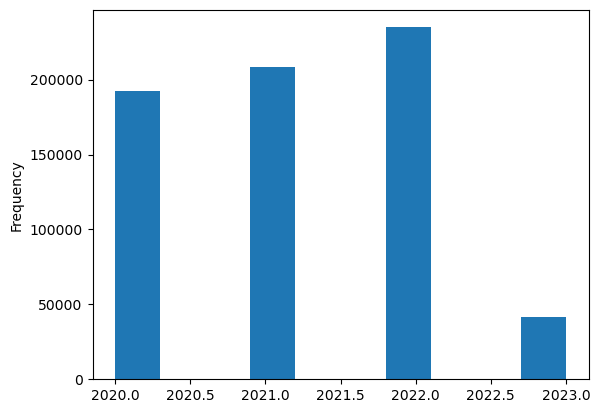

In [30]:
crime_data.Year.plot.hist()

In [31]:
#Univariate Analysis

In [32]:
crime_data.crm_cd_desc.value_counts

<bound method IndexOpsMixin.value_counts of DR_NO
10304468                              BATTERY - SIMPLE ASSAULT
190101086                             BATTERY - SIMPLE ASSAULT
200110444            SEX OFFENDER REGISTRANT OUT OF COMPLIANCE
191501505             VANDALISM - MISDEAMEANOR ($399 OR UNDER)
191921269    VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
                                   ...                        
231405429    THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...
231104474                   THEFT PLAIN - PETTY ($950 & UNDER)
230804266    THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...
231604807    VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
230906458             VANDALISM - MISDEAMEANOR ($399 OR UNDER)
Name: crm_cd_desc, Length: 677556, dtype: object>

In [33]:
crime_data. area_name.value_counts

<bound method IndexOpsMixin.value_counts of DR_NO
10304468       Southwest
190101086        Central
200110444        Central
191501505    N Hollywood
191921269        Mission
                ...     
231405429        Pacific
231104474      Northeast
230804266        West LA
231604807       Foothill
230906458       Van Nuys
Name: area_name, Length: 677556, dtype: object>

<AxesSubplot:>

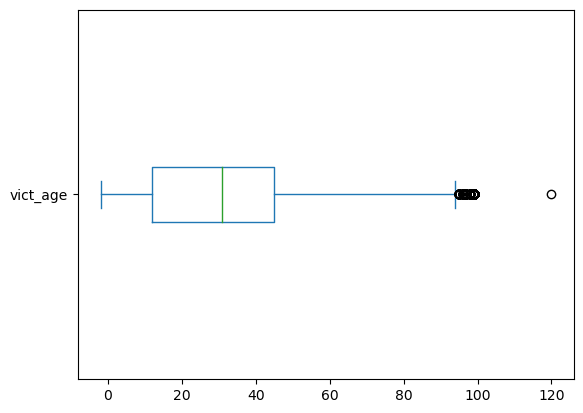

In [34]:
crime_data.vict_age.plot.box(vert=False)


<AxesSubplot:>

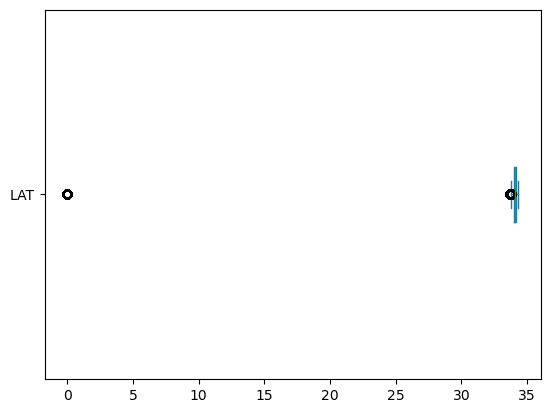

In [35]:
crime_data.LAT.plot.box(vert=False)

<AxesSubplot:>

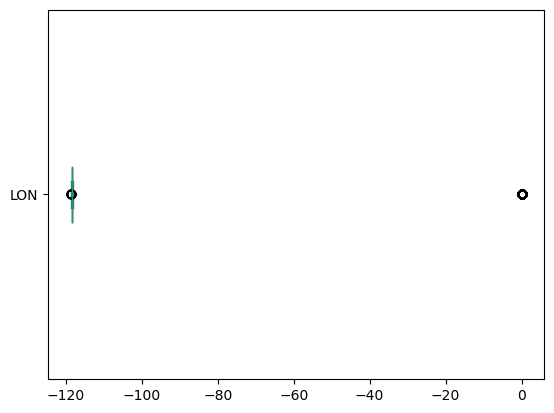

In [36]:
crime_data.LON.plot.box(vert=False)

<AxesSubplot:>

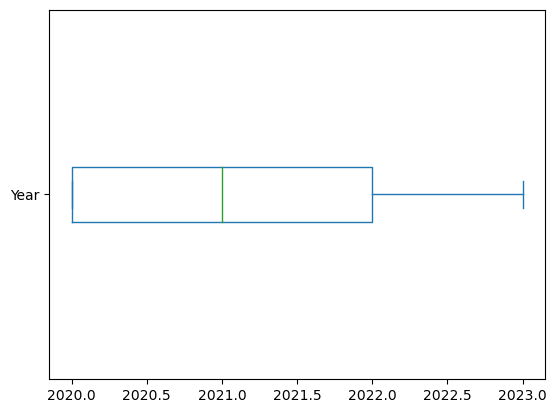

In [37]:
crime_data.Year.plot.box(vert=False)

<AxesSubplot:>

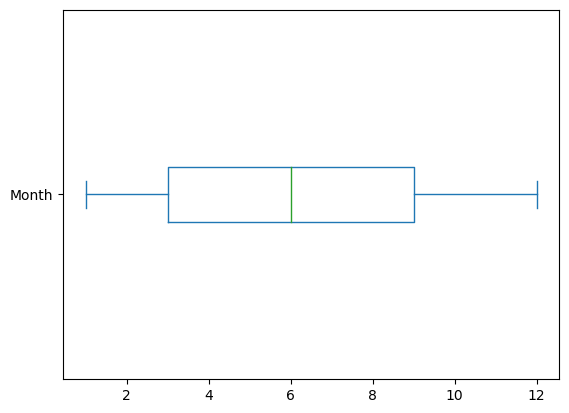

In [38]:
crime_data.Month.plot.box(vert=False)

<AxesSubplot:>

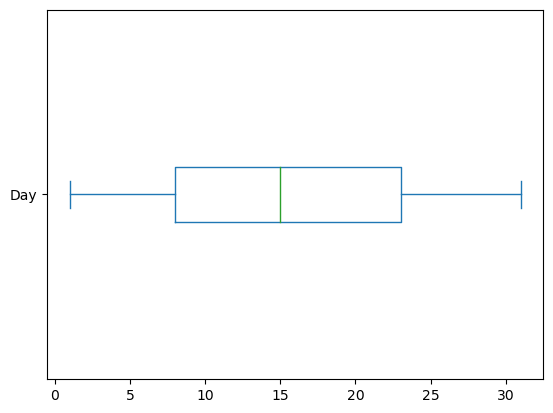

In [39]:
crime_data.Day.plot.box(vert=False)

<AxesSubplot:>

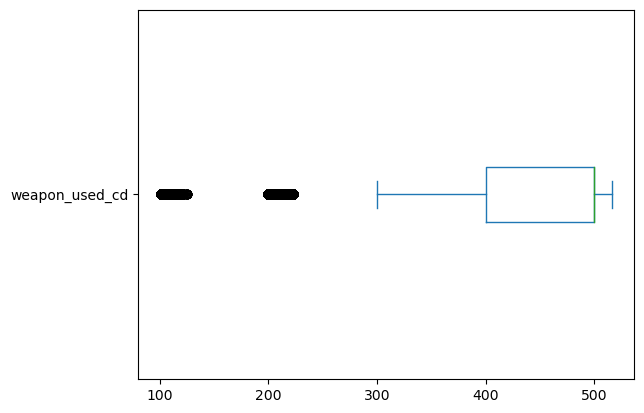

In [40]:
crime_data.weapon_used_cd.plot.box(vert=False)

<AxesSubplot:>

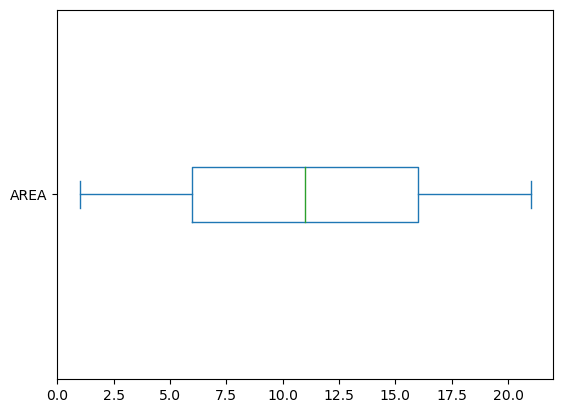

In [41]:
crime_data.AREA.plot.box(vert=False)

<AxesSubplot:>

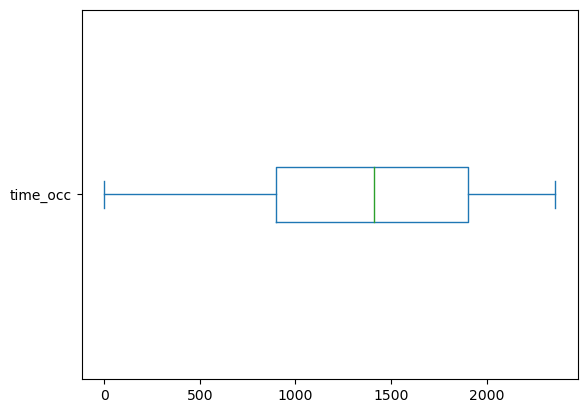

In [42]:
crime_data.time_occ.plot.box(vert=False)

<AxesSubplot:>

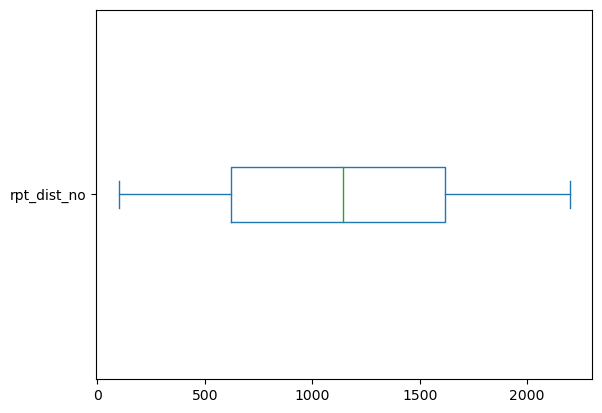

In [43]:
crime_data.rpt_dist_no.plot.box(vert=False)

In [44]:
#Exploratory data analysis

In [45]:
crime_type = crime_data.groupby('crm_cd').size()
print(crime_type)

crm_cd
AGG.ASSAULTS          40352
BTFV                  95254
BURGLARY              43864
Domestic.Violence     73886
HOMICIDE               1183
MVT                   75093
OTHER.THEFT          252145
PERSONAL.THFT          4662
RAPE                   4775
ROBBERY               26910
SIMPLE.ASSAULT        59432
dtype: int64


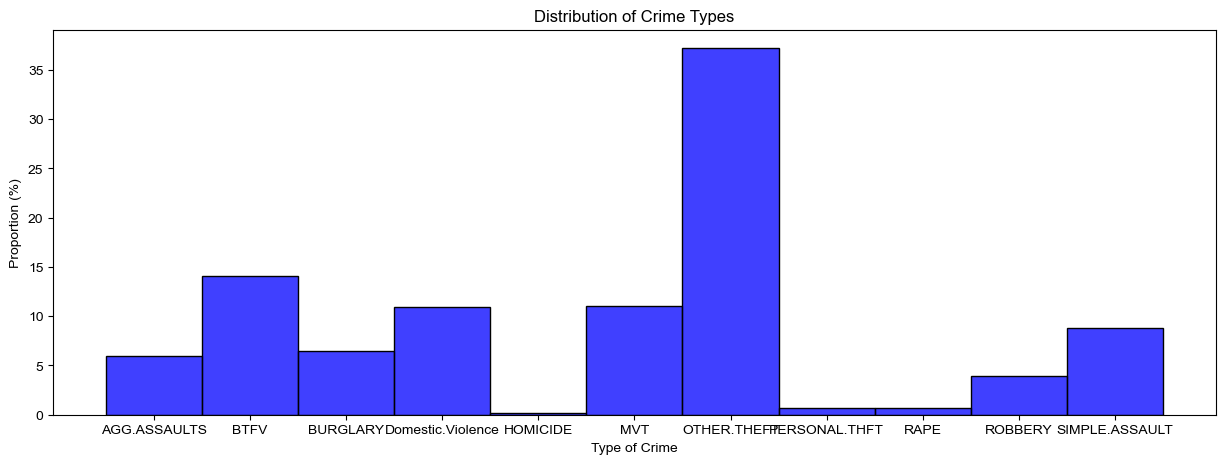

In [46]:
#Type of Crime：Identify the type of crime that occurs the most
crime_grouped = crime_data.groupby("crm_cd").size().reset_index(name="n")
crime_grouped["prop"] = round(crime_grouped["n"]/crime_grouped["n"].sum() * 100, 2)

fig, ax = plt.subplots(figsize=(15, 5))

sns.histplot(data=crime_grouped, x="crm_cd", weights="prop", kde=False, ax=ax, color="blue")

sns.set_style("white")
ax.set_title("Distribution of Crime Types")
ax.set_xlabel("Type of Crime")
ax.set_ylabel("Proportion (%)")

plt.show()
##Other theft account for most of the crime as shown below

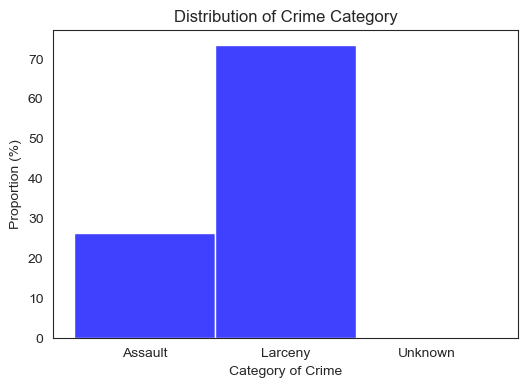

In [47]:
#Identify the crime category that occurs the most
##Type of Crime
crime_grouped = crime_data.groupby("crime_category").size().reset_index(name="n")
crime_grouped["prop"] = round(crime_grouped["n"]/crime_grouped["n"].sum() * 100, 2)

fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(data=crime_grouped, x="crime_category", weights="prop", kde=False, ax=ax, color="blue")

sns.set_style("white")
ax.set_title("Distribution of Crime Category")
ax.set_xlabel("Category of Crime")
ax.set_ylabel("Proportion (%)")

plt.show()

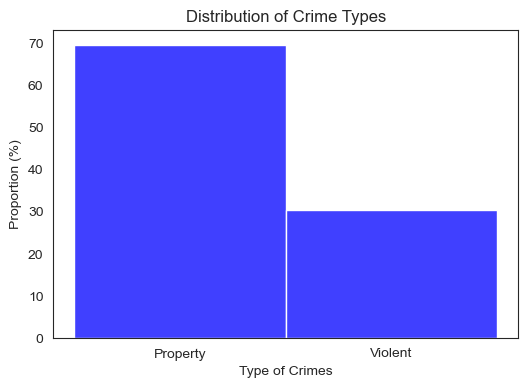

In [48]:
#Type of Crime：Identify the type of crime that occurs the most
crime_grouped = crime_data.groupby("crime_type").size().reset_index(name="n")
crime_grouped["prop"] = round(crime_grouped["n"]/crime_grouped["n"].sum() * 100, 2)

fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(data=crime_grouped, x="crime_type", weights="prop", kde=False, ax=ax, color="blue")

sns.set_style("white")
ax.set_title("Distribution of Crime Types")
ax.set_xlabel("Type of Crimes")
ax.set_ylabel("Proportion (%)")

plt.show()
##Other theft account for most of the crime as shown below

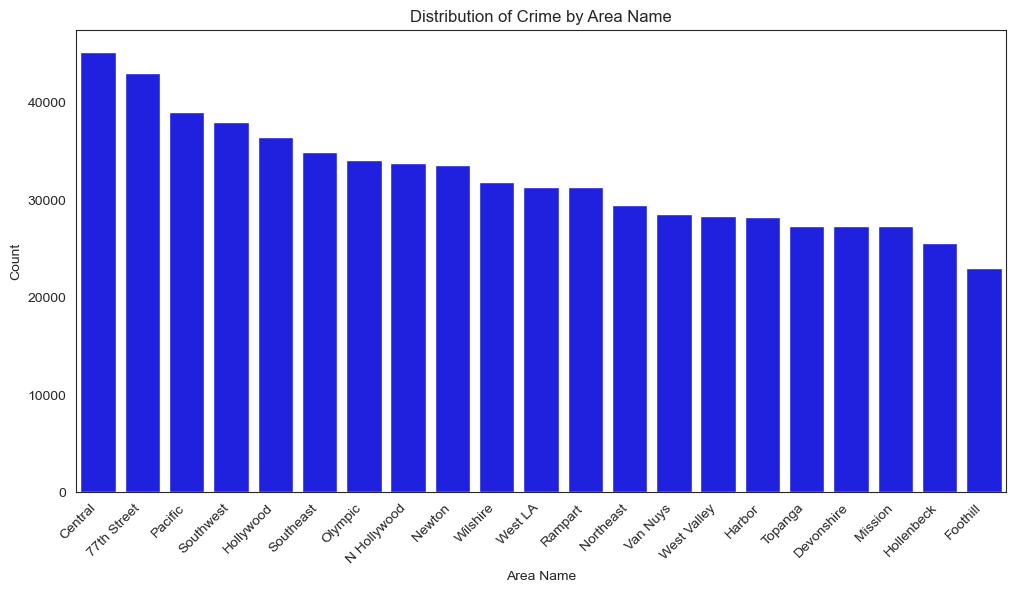

In [49]:
# Count the occurrences of each area name
area_counts = crime_data["area_name"].value_counts()

# Create a bar chart to visualize the distribution of area names
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=area_counts.index, y=area_counts.values, ax=ax, color="blue")
sns.set_style("white")
ax.set_title("Distribution of Crime by Area Name")
ax.set_xlabel("Area Name")
ax.set_ylabel("Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

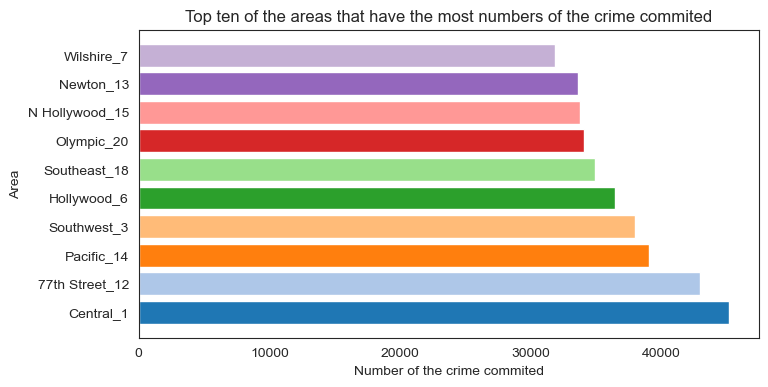

In [50]:
#Location where the crime took place：The top ten areas where most crime took place
# Find the Top 10 Regions where the most crimes happened
top10 = (crime_data.groupby(['area_name', 'AREA'])
         .size()
         .reset_index(name='n')
         .sort_values(by='n', ascending=False)
         .head(10))

# Create a new column 'Area' by concatenating 'AREA NAME' and 'Rpt Dist No'
top10['Area'] = top10['area_name'] + '_' + top10['AREA'].astype(str)

# Map each unique area_name to a unique color
color_dict = {area: plt.cm.tab20(i) for i, area in enumerate(top10['area_name'].unique())}

# Map area_name column to colors using the color_dict
colors = [color_dict[area] for area in top10['area_name']]

# Plot the Top 10 Regions
plt.figure(figsize=(8,4))
plt.barh(top10['Area'], top10['n'], color=colors)
plt.title('Top ten of the areas that have the most numbers of the crime commited')
plt.xlabel('Number of the crime commited')
plt.ylabel('Area')
plt.show()

<Figure size 800x400 with 0 Axes>

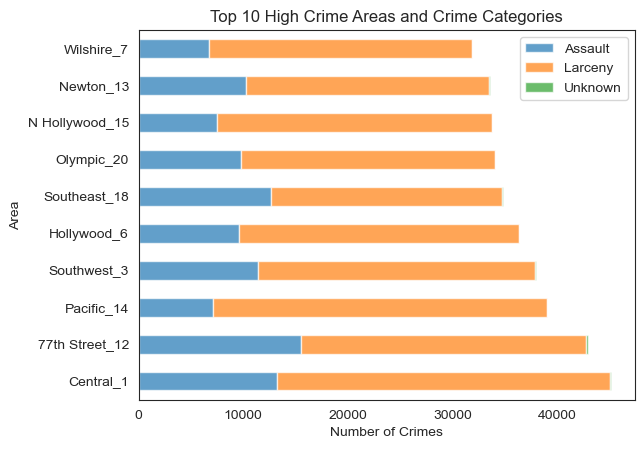

In [51]:
#DISTRIBUTION OF TOP TEN HIGH CRIME AREAS AND CRIME CATEGORY
# Assuming pandas library is imported and crime_data is the data frame
top_10_areas = crime_data['AREA'].value_counts().nlargest(10).index.tolist()

# Create a new column 'Area' by concatenating 'area_name' and 'AREA'
crime_data['Area'] = crime_data['area_name'] + '_' + crime_data['AREA'].astype(str)

crime_in_top_10 = crime_data[crime_data['AREA'].isin(top_10_areas)]
crime_categories_in_top_10 = crime_in_top_10['crime_category'].unique().tolist()

crime_counts = crime_in_top_10.groupby(['Area', 'crime_category']).size().unstack()

# Sort the bars in descending order of total crime counts for each area
crime_counts = crime_counts.loc[crime_counts.sum(axis=1).sort_values(ascending=False).index]

plt.figure(figsize=(8, 4))
crime_counts.plot(kind='barh', stacked=True, alpha=0.7)
plt.xlabel('Number of Crimes')
plt.title('Top 10 High Crime Areas and Crime Categories')
plt.legend(loc='upper right')
plt.show()


<Figure size 800x400 with 0 Axes>

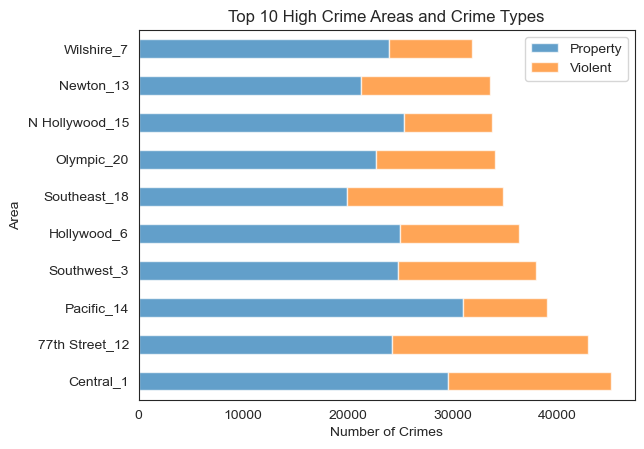

In [52]:
#DISTRIBUTION OF TOP TEN HIGH CRIME AREAS AND CRIME TYPES

# Assuming pandas library is imported and crime_data is the data frame
top_10_areas = crime_data['AREA'].value_counts().nlargest(10).index.tolist()

# Create a new column 'Area' by concatenating 'area_name' and 'AREA'
crime_data['Area'] = crime_data['area_name'] + '_' + crime_data['AREA'].astype(str)

crime_in_top_10 = crime_data[crime_data['AREA'].isin(top_10_areas)]
crime_categories_in_top_10 = crime_in_top_10['crime_type'].unique().tolist()

crime_counts = crime_in_top_10.groupby(['Area', 'crime_type']).size().unstack()

# Sort the bars in descending order of total crime counts for each area
crime_counts = crime_counts.loc[crime_counts.sum(axis=1).sort_values(ascending=False).index]

plt.figure(figsize=(8, 4))
crime_counts.plot(kind='barh', stacked=True, alpha=0.7)
plt.xlabel('Number of Crimes')
plt.title('Top 10 High Crime Areas and Crime Types')
plt.legend(loc='upper right')
plt.show()


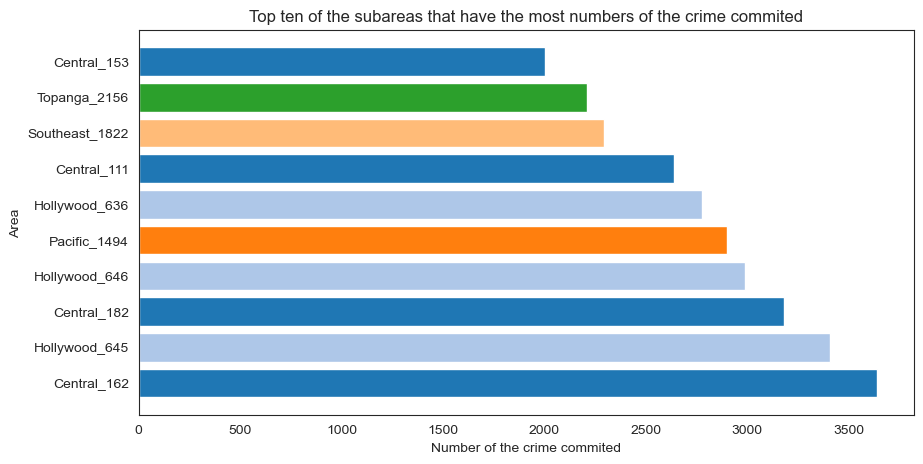

In [53]:
#Location where the crime took place：The top ten subareas where most crime took place
# Find the Top 10 Regions where the most crimes happened
top10 = (crime_data.groupby(['area_name', 'rpt_dist_no'])
         .size()
         .reset_index(name='n')
         .sort_values(by='n', ascending=False)
         .head(10))

# Create a new column 'Area' by concatenating 'AREA NAME' and 'Rpt Dist No'
top10['Area'] = top10['area_name'] + '_' + top10['rpt_dist_no'].astype(str)

# Map each unique area_name to a unique color
color_dict = {area: plt.cm.tab20(i) for i, area in enumerate(top10['area_name'].unique())}

# Map area_name column to colors using the color_dict
colors = [color_dict[area] for area in top10['area_name']]

# Plot the Top 10 Regions
plt.figure(figsize=(10,5))
plt.barh(top10['Area'], top10['n'], color=colors)
plt.title('Top ten of the subareas that have the most numbers of the crime commited')
plt.xlabel('Number of the crime commited')
plt.ylabel('Area')
plt.show()

<Figure size 1000x600 with 0 Axes>

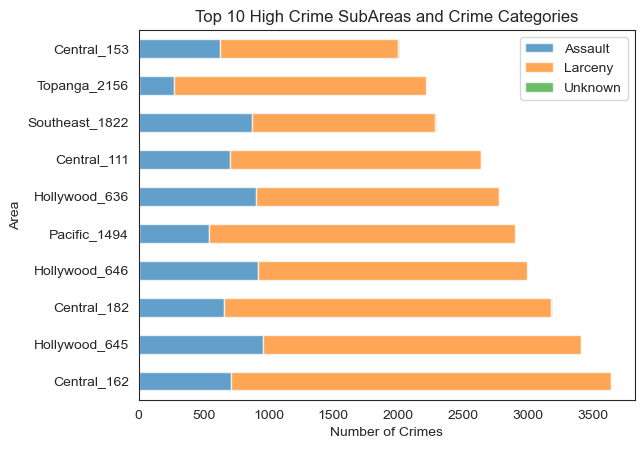

In [54]:
#Location where the crime took place：The top ten subareas with crime Categories
top_10_areas = crime_data['rpt_dist_no'].value_counts().nlargest(10).index.tolist()


# Create a new column 'Area' by concatenating 'AREA NAME' and 'Rpt Dist No'
crime_data['Area'] = crime_data['area_name'] + '_' + crime_data['rpt_dist_no'].astype(str)

# Create a new column 'Area' by concatenating 'area_name' and 'AREA'
#crime_data['Area'] = crime_data['area_name'] + '_' + crime_data['AREA'].astype(str)

crime_in_top_10 = crime_data[crime_data['rpt_dist_no'].isin(top_10_areas)]
crime_categories_in_top_10 = crime_in_top_10['crime_category'].unique().tolist()

crime_counts = crime_in_top_10.groupby(['Area', 'crime_category']).size().unstack()

# Sort the bars in descending order of total crime counts for each area
crime_counts = crime_counts.loc[crime_counts.sum(axis=1).sort_values(ascending=False).index]

plt.figure(figsize=(10, 6))
crime_counts.plot(kind='barh', stacked=True, alpha=0.7)
plt.xlabel('Number of Crimes')
plt.title('Top 10 High Crime SubAreas and Crime Categories')
plt.legend(loc='upper right')
plt.show()

<Figure size 1000x600 with 0 Axes>

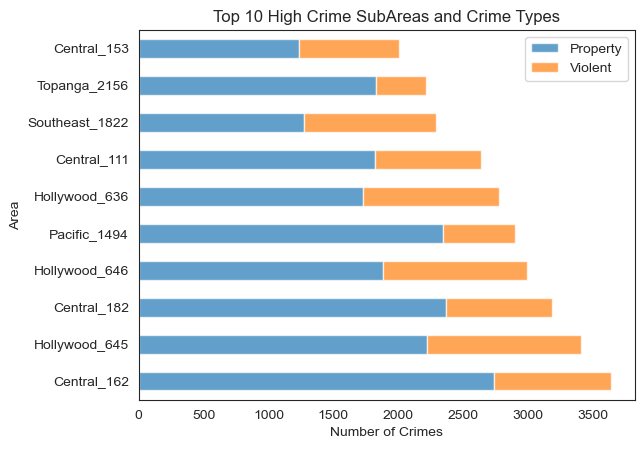

In [55]:

#Location where the crime took place：The top ten subareas where most crime took place with Crime types
# Assuming pandas library is imported and crime_data is the data frame
top_10_areas = crime_data['rpt_dist_no'].value_counts().nlargest(10).index.tolist()


# Create a new column 'Area' by concatenating 'AREA NAME' and 'Rpt Dist No'
crime_data['Area'] = crime_data['area_name'] + '_' + crime_data['rpt_dist_no'].astype(str)

# Create a new column 'Area' by concatenating 'area_name' and 'AREA'
#crime_data['Area'] = crime_data['area_name'] + '_' + crime_data['AREA'].astype(str)

crime_in_top_10 = crime_data[crime_data['rpt_dist_no'].isin(top_10_areas)]
crime_categories_in_top_10 = crime_in_top_10['crime_type'].unique().tolist()

crime_counts = crime_in_top_10.groupby(['Area', 'crime_type']).size().unstack()

# Sort the bars in descending order of total crime counts for each area
crime_counts = crime_counts.loc[crime_counts.sum(axis=1).sort_values(ascending=False).index]

plt.figure(figsize=(10, 6))
crime_counts.plot(kind='barh', stacked=True, alpha=0.7)
plt.xlabel('Number of Crimes')
plt.title('Top 10 High Crime SubAreas and Crime Types')
plt.legend(loc='upper right')
plt.show()

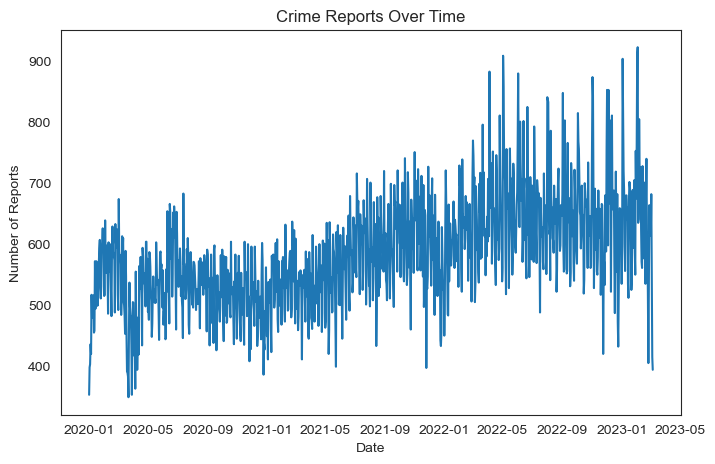

In [56]:
#visualizing the frequency of crimes that occurred at different times of the day, with an increasing trend in crime rate as the day progresses
#number of crime reports over time. using timeseries graph
crime_data['Date'] = pd.to_datetime(crime_data[['Year', 'Month', 'Day']])

# Group the crime reports by date and count the number of reports per day
daily_counts = crime_data.groupby('Date').size()

# Plot the daily crime report counts as a time series
plt.figure(figsize=(8, 5))
plt.plot(daily_counts.index, daily_counts.values)
plt.title('Crime Reports Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reports')
plt.show()


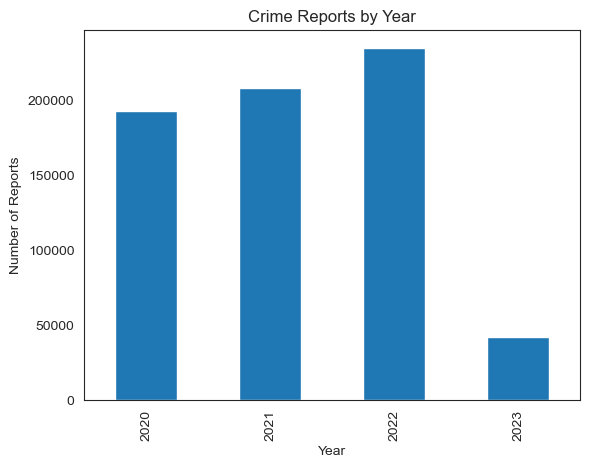

In [57]:
#Get the Crime report by Year
crime_data['Date'] = pd.to_datetime(crime_data[['Year', 'Month', 'Day']])

# Extract the year from the date column and plot a bar plot of the counts
crime_data['Date'].dt.year.value_counts().sort_index().plot(kind='bar')

plt.title('Crime Reports by Year')
plt.xlabel('Year')
plt.ylabel('Number of Reports')
plt.show()


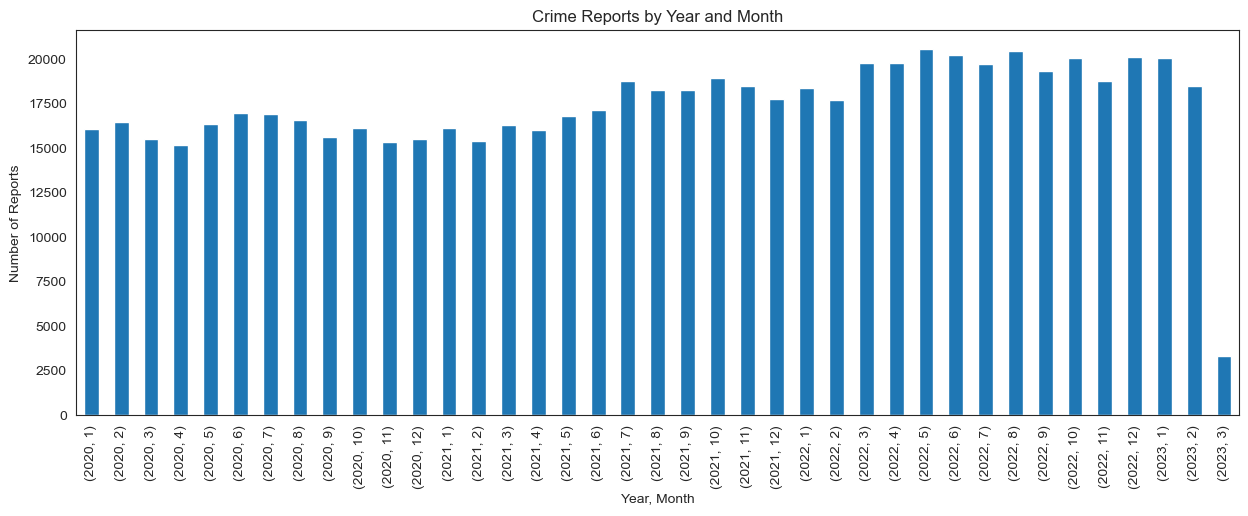

In [58]:
#Crime report by Month/year
# Assuming the crime_data DataFrame has columns called "Year", "Month", and "Day"
crime_data['Date'] = pd.to_datetime(crime_data[['Year', 'Month', 'Day']])

# Group the crime reports by year and month and count the number of reports per month
monthly_counts = crime_data.groupby([crime_data['Date'].dt.year, crime_data['Date'].dt.month]).size()

# Plot the monthly crime report counts as a bar chart
fig, ax = plt.subplots(figsize=(15, 5))
monthly_counts.plot(kind='bar', ax=ax)
ax.set_title('Crime Reports by Year and Month')
ax.set_xlabel('Year, Month')
ax.set_ylabel('Number of Reports')
plt.show()


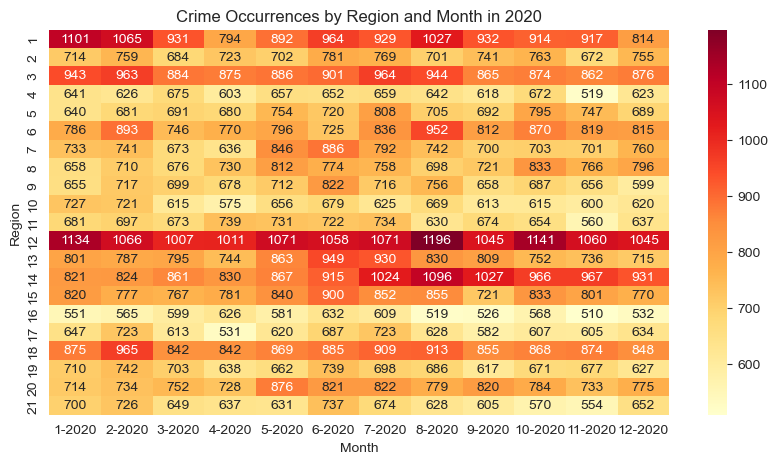

In [59]:
#crime Occurence by Region and Month 2020
# Filter the data to only include the year 2020
crime_data_2020 = crime_data[crime_data['Year'] == 2020]

# Group the data by region, year, and month to get the total number of crimes in each region for each month and year in 2020
crime_data_grouped = crime_data_2020.groupby(['AREA', 'Year', 'Month', 'crm_cd_desc']).size().reset_index(name='crime_count')  

# Plot the data using a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(crime_data_grouped.pivot_table(values='crime_count', index='AREA', columns=['Month', 'Year'], aggfunc='sum', fill_value=0), cmap='YlOrRd', annot=True, fmt='g')
plt.title('Crime Occurrences by Region and Month in 2020')
plt.xlabel('Month')
plt.ylabel('Region')
plt.show()


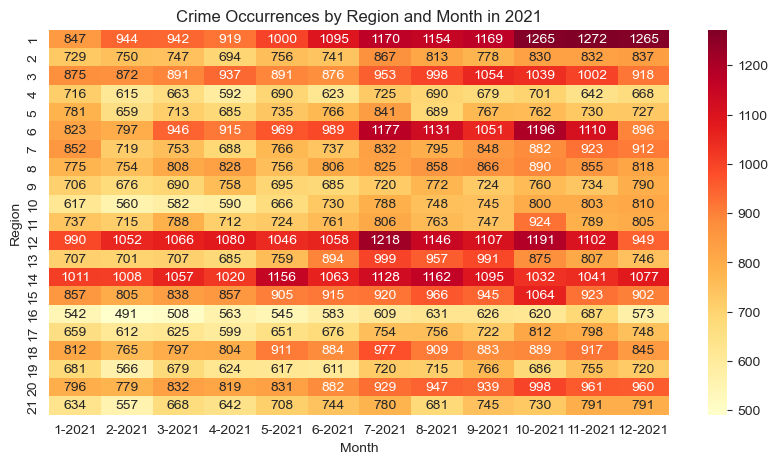

In [60]:
#crime Occurence by Region and Month 2021
# Filter the data to only include the year 2021
crime_data_2021 = crime_data[crime_data['Year'] == 2021]

# Group the data by region, year, and month to get the total number of crimes in each region for each month and year in 2021
crime_data_grouped = crime_data_2021.groupby(['AREA', 'Year', 'Month', 'crm_cd_desc']).size().reset_index(name='crime_count')  

# Plot the data using a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(crime_data_grouped.pivot_table(values='crime_count', index='AREA', columns=['Month', 'Year'], aggfunc='sum', fill_value=0), cmap='YlOrRd', annot=True, fmt='g')
plt.title('Crime Occurrences by Region and Month in 2021')
plt.xlabel('Month')
plt.ylabel('Region')
plt.show()

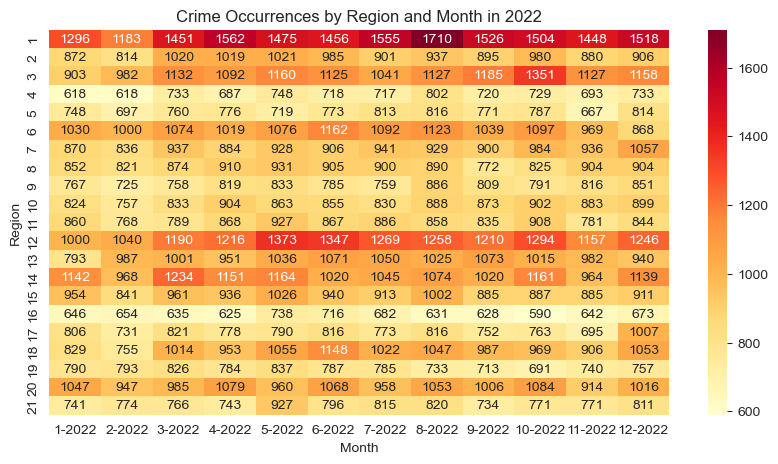

In [61]:
#crime Occurence by Region and Month 2022
# Filter the data to only include the year 2022
crime_data_2022 = crime_data[crime_data['Year'] == 2022]

# Group the data by region, year, and month to get the total number of crimes in each region for each month and year in 2022
crime_data_grouped = crime_data_2022.groupby(['AREA', 'Year', 'Month', 'crm_cd_desc']).size().reset_index(name='crime_count')  

# Plot the data using a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(crime_data_grouped.pivot_table(values='crime_count', index='AREA', columns=['Month', 'Year'], aggfunc='sum', fill_value=0), cmap='YlOrRd', annot=True, fmt='g')
plt.title('Crime Occurrences by Region and Month in 2022')
plt.xlabel('Month')
plt.ylabel('Region')
plt.show()

In [62]:
# Use groupby() and first() methods to get the corresponding AREA for each area_name
area_mapping = crime_data.groupby('area_name')['AREA'].first()

# Print the area_mapping Series
print(area_mapping)



area_name
77th Street    12
Central         1
Devonshire     17
Foothill       16
Harbor          5
Hollenbeck      4
Hollywood       6
Mission        19
N Hollywood    15
Newton         13
Northeast      11
Olympic        20
Pacific        14
Rampart         2
Southeast      18
Southwest       3
Topanga        21
Van Nuys        9
West LA         8
West Valley    10
Wilshire        7
Name: AREA, dtype: int64


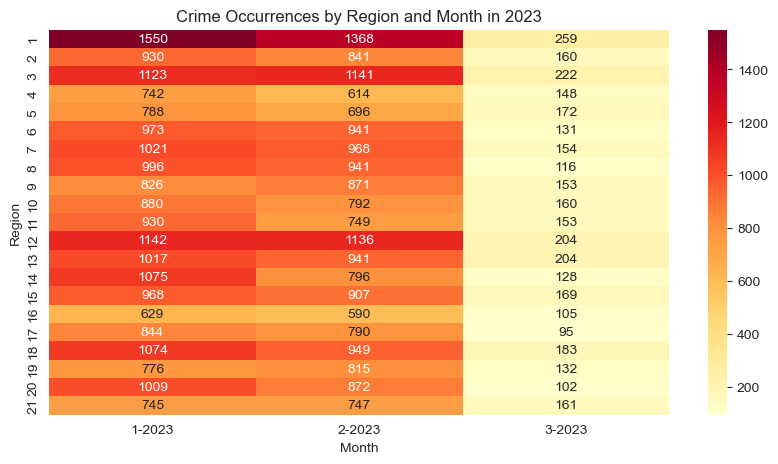

In [63]:
#crime Occurence by Region and Month 2023
# Filter the data to only include the year 2023
crime_data_2023 = crime_data[crime_data['Year'] == 2023]

# Group the data by region, year, and month to get the total number of crimes in each region for each month and year in 2023
crime_data_grouped = crime_data_2023.groupby(['AREA', 'Year', 'Month', 'crm_cd_desc']).size().reset_index(name='crime_count')  

# Plot the data using a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(crime_data_grouped.pivot_table(values='crime_count', index='AREA', columns=['Month', 'Year'], aggfunc='sum', fill_value=0), cmap='YlOrRd', annot=True, fmt='g')
plt.title('Crime Occurrences by Region and Month in 2023')
plt.xlabel('Month')
plt.ylabel('Region')
plt.show()

In [64]:
crime_data['vict_age'].astype(int)

DR_NO
10304468     36
190101086    25
200110444     0
191501505    76
191921269    31
             ..
231405429     0
231104474    42
230804266    48
231604807    23
230906458    53
Name: vict_age, Length: 677556, dtype: int32

In [65]:
#distribution of victim ages for different areas

In [66]:
#Victim age distribution: this plot allows us to visualize the distribution of victim ages 
#in the crime_data dataset, and to identify any patterns or trends in the data. 
#We can see how many victims fall into each age range, and whether there are any age
#groups that are overrepresented or underrepresented in the dataset.

In [67]:
#Victim Age by Areas: show the distribution of victim ages across the selected areas. 
#each histogram represents a different selected area, 
#and the color of each histogram will be based on the selected color palette.

#The purpose of the code is to provide a visual representation of the distribution of victim ages 
#across selected areas to help understand the crime data.

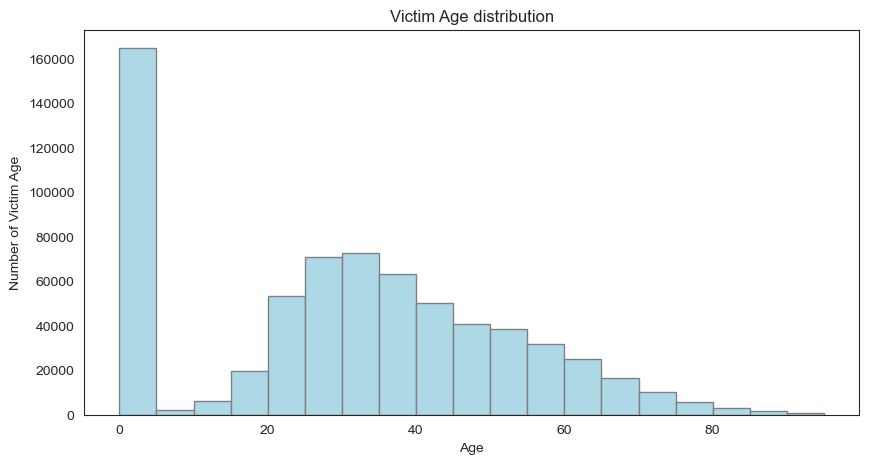

In [68]:
#Victim Age Dsitribution
plt.figure(figsize=(10,5))
plt.hist(crime_data['vict_age'], bins=range(0, 100, 5), color='lightblue', edgecolor='grey')
plt.title('Victim Age distribution')
plt.xlabel('Age')
plt.ylabel('Number of Victim Age')
plt.show()

In [69]:
#Define the age category from the Vict_age column
def Age_Category(col):
    if (col <= 0):
        return 'Unknown Age'
    elif (col > 0) & (col <= 14):
        return 'Children'
    elif (col >= 15) & (col <= 24):
        return 'Youth'
    elif (col >= 25) & (col <= 64):
        return 'Adult'
    else:
        return 'senior'


In [70]:
#Get the age distribution
age_distribution = crime_data['vict_age'].apply(Age_Category)
age_distribution.value_counts()

Adult          393153
Unknown Age    163840
Youth           73187
senior          37972
Children         9404
Name: vict_age, dtype: int64

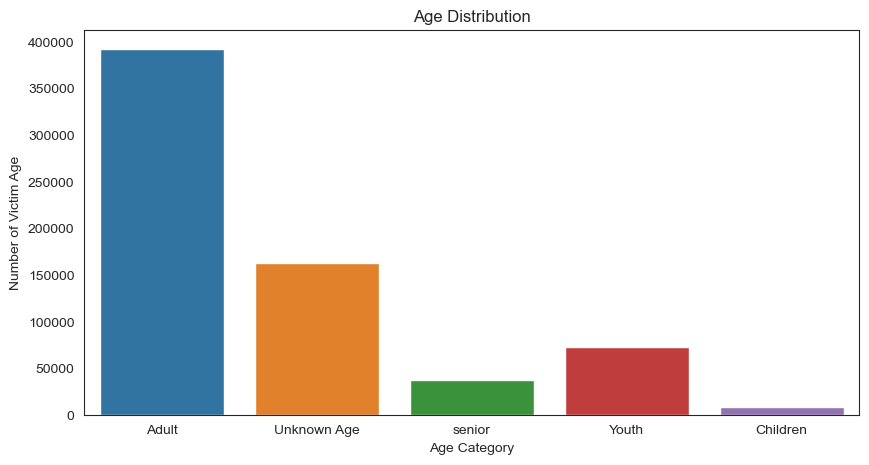

In [71]:
#Plot bar char to see the age distribution
plt.figure(figsize=(10,5))
age_distribution = crime_data['vict_age'].apply(Age_Category)
age_counts = age_distribution.value_counts()

sns.countplot(x=age_distribution)
plt.title('Age Distribution')
plt.xlabel('Age Category')
plt.ylabel('Number of Victim Age')
plt.show()

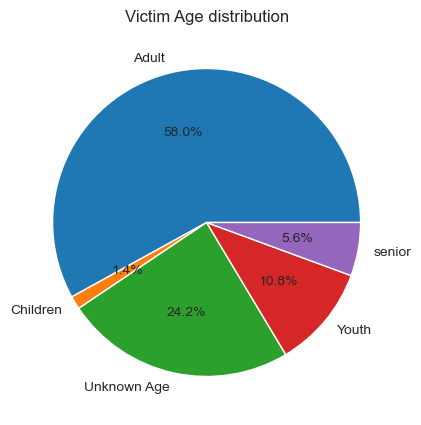

In [72]:
#distribution of Age CAtegory
crime_data['Age_Category'] = crime_data['vict_age'].apply(Age_Category)

age_count = crime_data.groupby(['Age_Category', 'area_name']).size().reset_index(name='counts')

age_count.groupby('Age_Category')['counts'].sum().plot(kind='pie', figsize=(10, 5), autopct='%1.1f%%')
plt.title('Victim Age distribution')
plt.ylabel('')
plt.show()

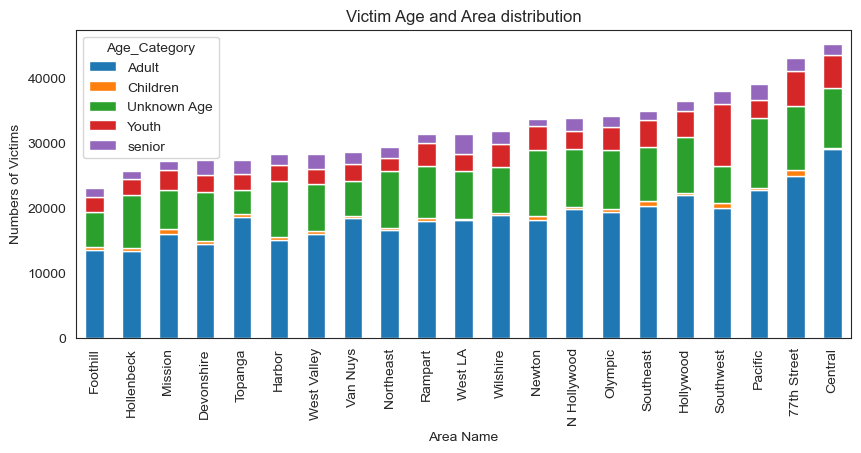

In [73]:
#Get the Victim age by Area Distribution
# Calculate the crime count by age category and area name
age_count = crime_data.groupby(['Age_Category', 'area_name']).size().reset_index(name='counts')

# Calculate the total crime count for each area name
total_counts = age_count.groupby('area_name')['counts'].sum().reset_index(name='total_counts')

# Sort the data by total crime count for each area name in ascending order
total_counts = total_counts.sort_values(by='total_counts', ascending=True)

# Use the sorted area names to sort the stacked bars in the plot
sorted_area_names = total_counts['area_name'].tolist()

# Pivot the data to create a stacked bar plot with sorted area names
age_count_pivot = age_count.pivot(index='area_name', columns='Age_Category', values='counts')
age_count_pivot = age_count_pivot.loc[sorted_area_names]
age_count_pivot.plot(kind='bar', stacked=True, figsize=(10, 4))

# Add title and axis labels
plt.title('Victim Age and Area distribution')
plt.xlabel('Area Name')
plt.ylabel('Numbers of Victims')

# Show the plot
plt.show()


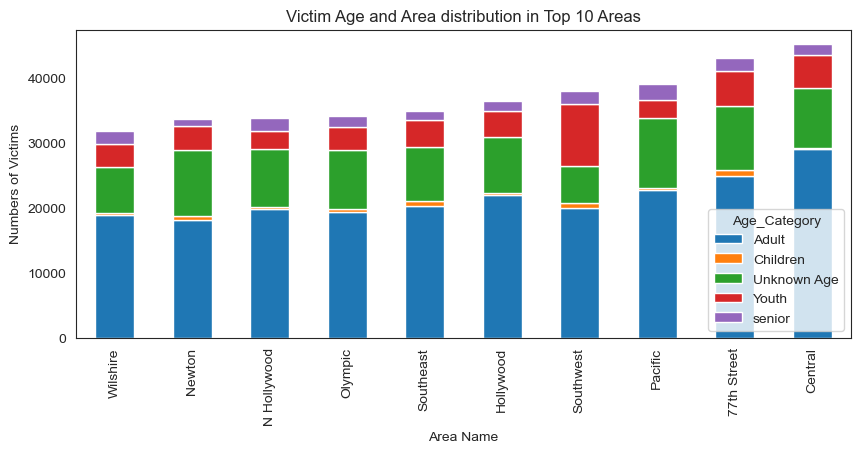

In [74]:
#Get the Victim Age by Area Distribution in the top 10 Areas
# Calculate the total crime count for each area name
total_counts = age_count.groupby('area_name')['counts'].sum().reset_index(name='total_counts')

# Sort the data by total crime count for each area name in descending order and get top 10 areas
top10_area_names = total_counts.sort_values(by='total_counts', ascending=False).head(10)['area_name'].tolist()

# Filter the age_count dataframe to keep only the top 10 areas
age_count_top10 = age_count[age_count['area_name'].isin(top10_area_names)]

# Use the sorted area names to sort the stacked bars in the plot
sorted_area_names = age_count_top10.groupby('area_name')['counts'].sum().sort_values().index.tolist()

# Pivot the data to create a stacked bar plot with sorted area names
age_count_top10_pivot = age_count_top10.pivot(index='area_name', columns='Age_Category', values='counts')
age_count_top10_pivot = age_count_top10_pivot.loc[sorted_area_names]
age_count_top10_pivot.plot(kind='bar', stacked=True, figsize=(10, 4))

# Add title and axis labels
plt.title('Victim Age and Area distribution in Top 10 Areas')
plt.xlabel('Area Name')
plt.ylabel('Numbers of Victims')

# Show the plot
plt.show()


In [75]:
#Victim Sex Distribution: this plot allows us to visualize the distribution of victim sex in the crime_data dataset, 
#and to identify whether there are any imbalances or biases in the data. 
#We can see how many victims are male and how many are female, 
#and whether there are any other categories of sex that are present in the data.

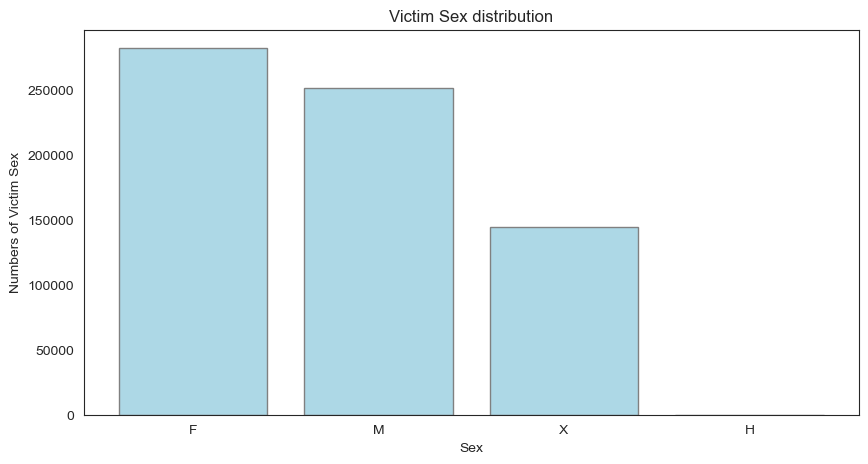

In [76]:
#Get the Victim SEx Distribution
plt.figure(figsize=(10,5))

# Create a bar plot of victim sex distribution
plt.bar(crime_data['vict_sex'].unique(), crime_data['vict_sex'].value_counts(), color='lightblue', edgecolor='grey')

# Add title and axis labels
plt.title('Victim Sex distribution')
plt.xlabel('Sex')
plt.ylabel('Numbers of Victim Sex')

# Display the plot
plt.show()

In [77]:
#Victim sex distribution by region. The chart shows that, except for the Southeast region, 
#male victims are more common than female victims in other regions. 
#For example, in the Central region, about 60% of the victims are male 
#and 40% are female. In the Hollywood region, about 70% of the victims are male and 30% are female. 
#In the Southeast region, the proportion of male and female victims is roughly equal.

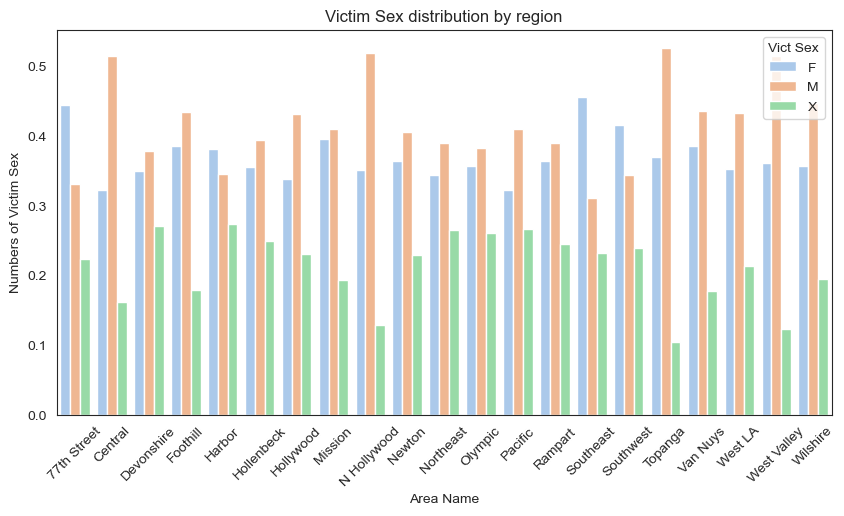

In [78]:
#the distribution of the Sex of the victim by region
# Get all regions from the dataset
regions = crime_data['area_name'].unique()

# Filter out unknown victim sexes and select only the desired regions
filtered_data = crime_data[(crime_data['area_name'].isin(regions)) & (~crime_data['vict_sex'].isin(['H']))]

# Group the data by region and victim sex, and calculate the counts and proportions
grouped_data = filtered_data.groupby(['area_name', 'vict_sex']).size().reset_index(name='counts')
grouped_data['prop'] = grouped_data.groupby('area_name')['counts'].apply(lambda x: x / x.sum())

# Plot the data using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x='area_name', y='prop', hue='vict_sex', data=grouped_data, palette='pastel')
plt.title('Victim Sex distribution by region')
plt.xlabel('Area Name')
plt.ylabel('Numbers of Victim Sex')
plt.legend(title='Vict Sex', loc='upper right')
plt.xticks(rotation=45)
plt.show()


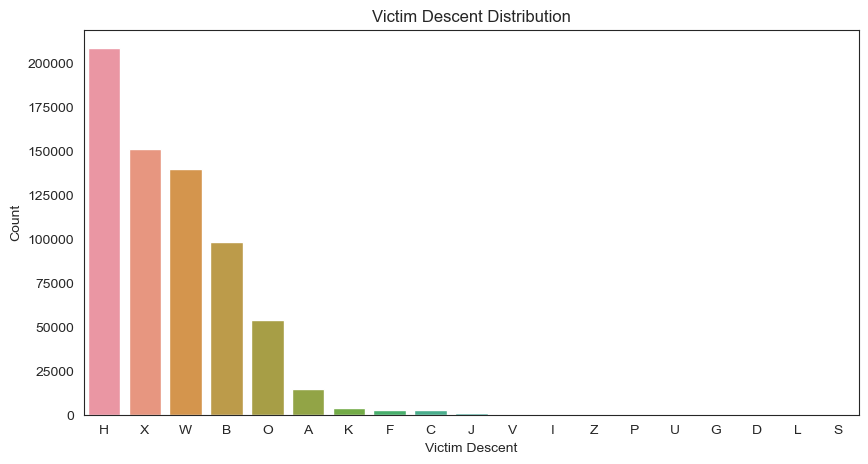

In [79]:
#Analyzing and visualizing the distribution of victim descent across different areas
#Victim distribution in the dataset

plt.figure(figsize=(10, 5))

# Count the number of occurrences of each victim descent
counts = crime_data['vict_descent'].value_counts()

# Create a bar chart of the counts using seaborn
sns.barplot(x=counts.index, y=counts.values)

# Set the title and axis labels
plt.title('Victim Descent Distribution')
plt.xlabel('Victim Descent')
plt.ylabel('Count')

# Show the chart
plt.show()


In [80]:
#Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian 
#F - Filipino G - Guamanian H - Hispanic/Latin/Mexican 
#I - American Indian/Alaskan Native J - Japanese K - Korean 
#L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian
#V - Vietnamese W - White X - Unknown Z - Asian Indian

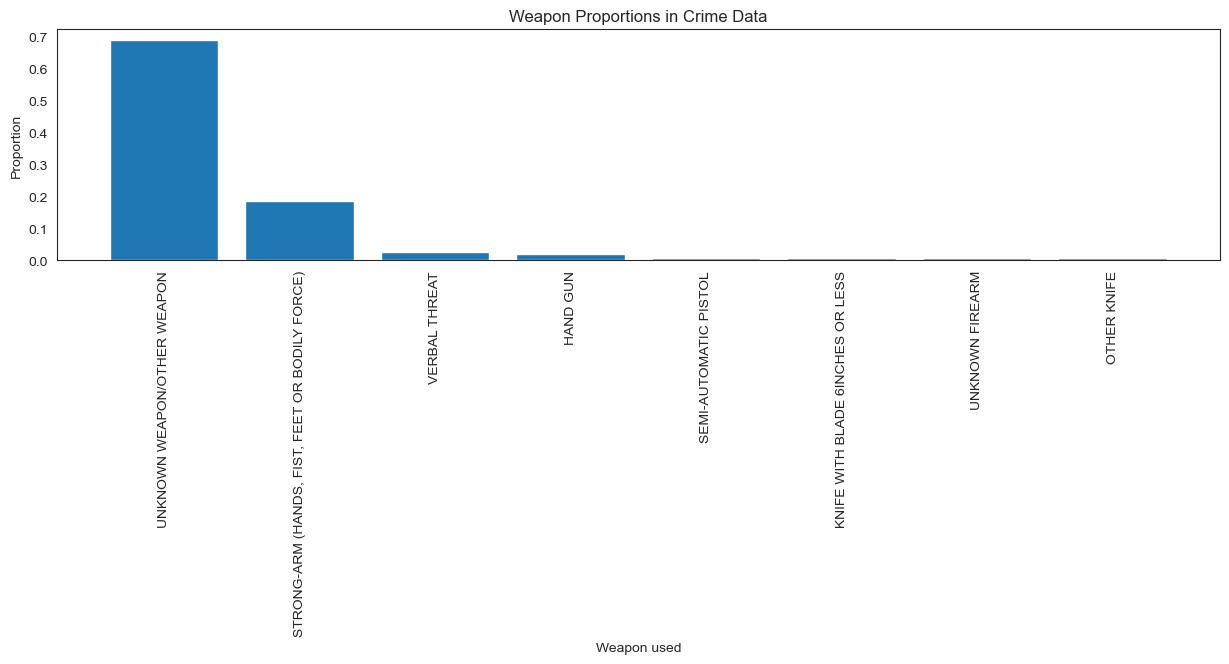

In [81]:
#Visualising the weapons used and the distribution across the data
#proportion and types of weapon used 
## Count the number of occurrences of each weapon description
weapon_counts = crime_data['weapon_desc'].value_counts()

# Calculate the proportion of each weapon description out of the total number of crimes
weapon_props = weapon_counts / sum(weapon_counts)

# Filter out any weapon descriptions that have a proportion less than 0.5%
weapon_props = weapon_props[weapon_props >= 0.005]

# Create a bar chart to show the proportion of different types of weapons used in crimes
plt.figure(figsize=(15, 3))
plt.bar(weapon_props.index, weapon_props)
plt.xticks(rotation=90)
plt.xlabel('Weapon used')
plt.ylabel('Proportion')
plt.title('Weapon Proportions in Crime Data')
plt.show()